# Data Loading

Data yang digunakan adalah dataset Health and Lifestyle Data for Regression yang diambil dari Kaggle (https://www.kaggle.com/datasets/pratikyuvrajchougule/health-and-lifestyle-data-for-regression).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/DBS/Data/health_data.csv')
data.head()

Mounted at /content/drive


,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894


# Exploratory Data Analysis - Deskripsi Variabel

Deskripsi Fitur
Berdasarkan informasi dari Kaggle, fitur-fitur pada dataset adalah sebagai berikut:

- Age: Usia individu dalam tahun (fitur kontinu).
- BMI: Body Mass Index individu (fitur kontinu).
- Exercise_Frequency: Jumlah hari dalam seminggu individu berolahraga (fitur kategorikal dengan nilai 0-7).
- Diet_Quality: Indeks kualitas diet, semakin tinggi nilai menunjukkan pola makan yang lebih sehat (fitur kontinu, rentang 0-100).
- Sleep_Hours: Rata-rata jam tidur per malam (fitur kontinu).
- Smoking_Status: Status merokok (fitur biner, 0 = bukan perokok, 1 = perokok).
- Alcohol_Consumption: Rata-rata konsumsi alkohol dalam satuan unit per minggu (fitur kontinu).
- Health_Score: Skor kesehatan yang dihitung sebagai indikator status kesehatan keseluruhan (fitur kontinu, rentang 0-100).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


In [4]:
data.describe()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.231985,25.354181,2.888000,69.952977,6.973135,0.499000,3.079377,85.479947
std,11.750591,4.987272,1.995354,14.972061,1.517218,0.500249,2.084564,13.633845
min,1.104792,10.298057,0.000000,19.907497,2.431107,0.000000,-3.592506,29.106017
25%,32.228916,21.968792,1.000000,59.945481,5.903351,0.000000,1.644111,76.430819
50%,40.303607,25.315386,3.000000,69.975151,6.990847,0.000000,3.064261,87.498996
75%,47.775327,28.644411,5.000000,80.527839,8.054595,1.000000,4.489293,99.762644
max,86.232778,40.965538,6.000000,110.265186,11.638962,1.000000,11.105100,100.000000


In [5]:
data.shape

(1000, 8)

Dataset terdiri dari 1000 baris data dan 8 kolom.

## Mengecek Missing Value

In [6]:
pd.DataFrame({'Nilai yang Kosong':data.isna().sum()})

,Nilai yang Kosong
Age,0
BMI,0
Exercise_Frequency,0
Diet_Quality,0
Sleep_Hours,0
Smoking_Status,0
Alcohol_Consumption,0
Health_Score,0


Pada dataset tidak terdapat missing values.

## Mengecek Duplikasi Data

In [7]:
duplicate_rows = data[data.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")
print(duplicate_rows.head())


Jumlah baris duplikat: 0
Empty DataFrame
Columns: [Age, BMI, Exercise_Frequency, Diet_Quality, Sleep_Hours, Smoking_Status, Alcohol_Consumption, Health_Score]
Index: []


Pada dataset tidak terdapat data duplikat.

## Mengecek Outliers

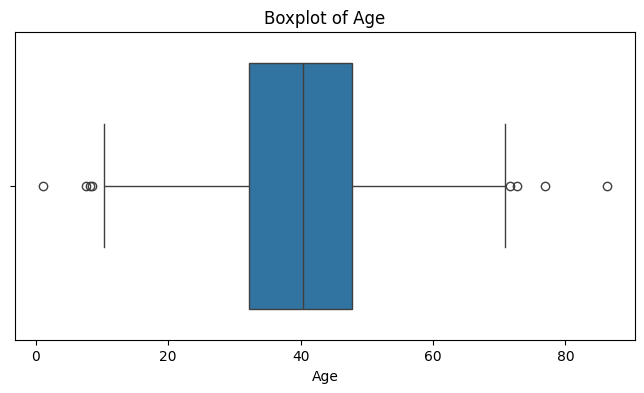

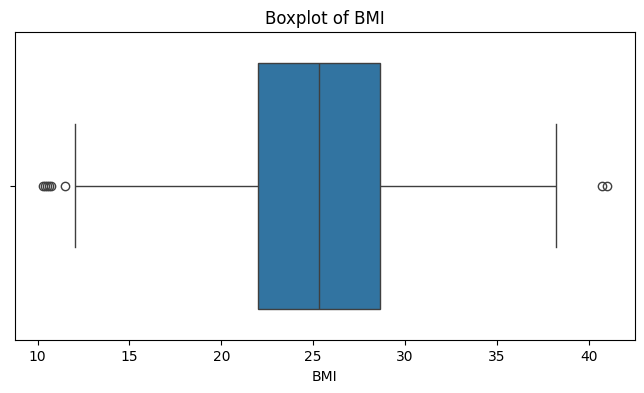

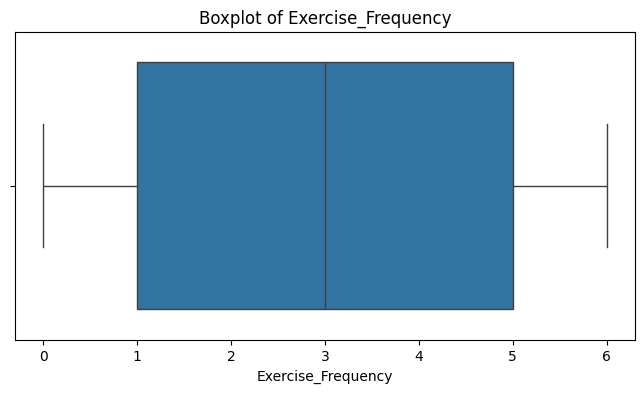

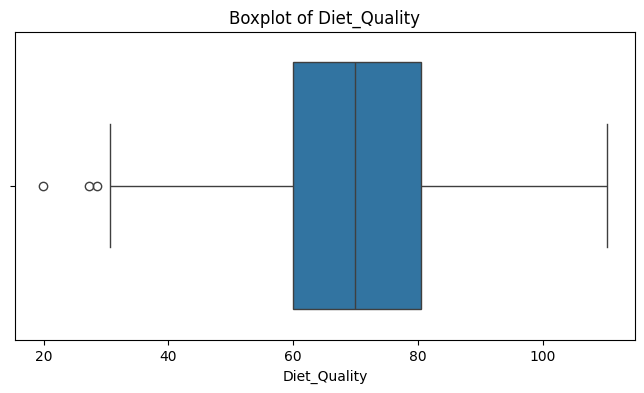

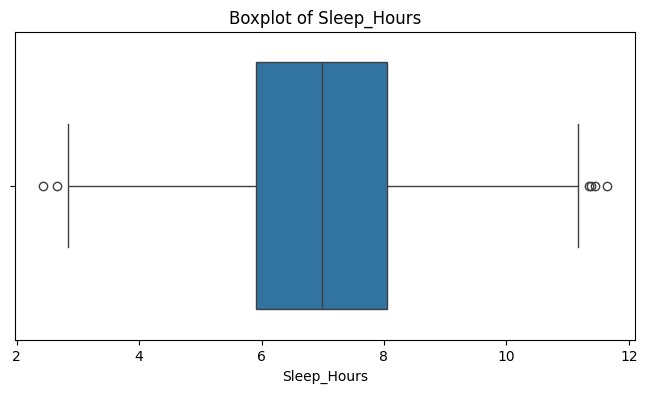

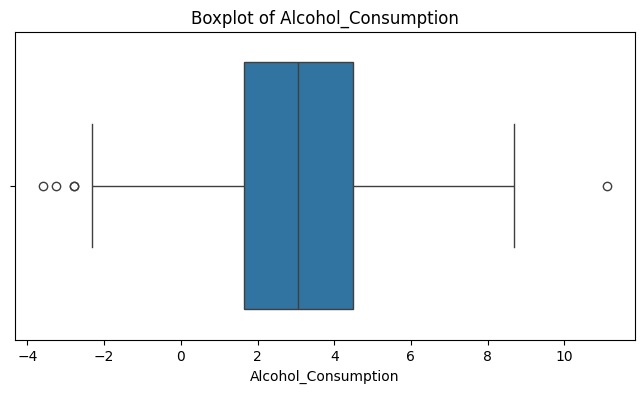

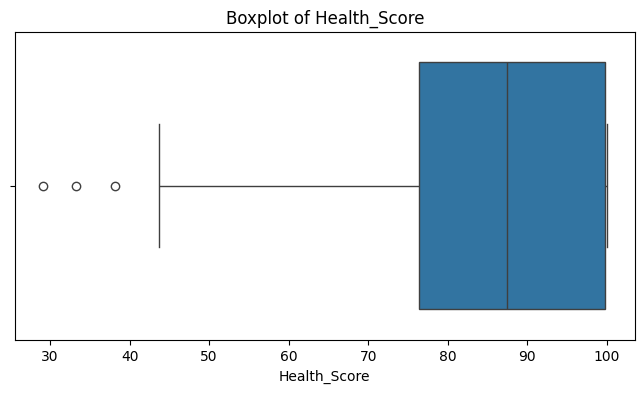

Kolom 'Age' memiliki 8 outlier.
----------------------------------------
Kolom 'BMI' memiliki 8 outlier.
----------------------------------------
Kolom 'Exercise_Frequency' memiliki 0 outlier.
----------------------------------------
Kolom 'Diet_Quality' memiliki 3 outlier.
----------------------------------------
Kolom 'Sleep_Hours' memiliki 6 outlier.
----------------------------------------
Kolom 'Alcohol_Consumption' memiliki 5 outlier.
----------------------------------------
Kolom 'Health_Score' memiliki 3 outlier.
----------------------------------------


In [8]:
numerical_features = ['Age', 'BMI', 'Exercise_Frequency', 'Diet_Quality', 'Sleep_Hours','Alcohol_Consumption', 'Health_Score']

for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Fungsi deteksi outlier dengan metode IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

for col in numerical_features:
    outliers = detect_outliers_iqr(data, col)
    print(f"Kolom '{col}' memiliki {len(outliers)} outlier.")
    print("-" * 40)


Dari visualisasi boxplot tersebut dapat terlihat bahwa terdapat beberapa fitur yang memiliki outliers, yaitu Age (8 outliers), BMI (8 outliers), Alcohol Consumption (5 outliers), Diet Quality (3 outliers), Sleep Hours (6 outliers), dan Health Score (3 outliers).

## Menangani Outliers

In [9]:
def handle_outliers_iqr(data, cols):
    data_handled = data.copy()
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)

        # Ganti nilai yang lebih kecil dari Q1 dengan Q1
        data_handled.loc[data_handled[col] < Q1, col] = Q1

        # Ganti nilai yang lebih besar dari Q3 dengan Q3
        data_handled.loc[data_handled[col] > Q3, col] = Q3

    return data_handled

data_cleaned = handle_outliers_iqr(data, numerical_features)

# Cek ulang outlier setelah penanganan
for col in numerical_features:
    outliers = detect_outliers_iqr(data_cleaned, col)
    print(f"Setelah penanganan, kolom '{col}' memiliki {len(outliers)} outlier.")
    print("-" * 40)


Setelah penanganan, kolom 'Age' memiliki 0 outlier.
----------------------------------------
Setelah penanganan, kolom 'BMI' memiliki 0 outlier.
----------------------------------------
Setelah penanganan, kolom 'Exercise_Frequency' memiliki 0 outlier.
----------------------------------------
Setelah penanganan, kolom 'Diet_Quality' memiliki 0 outlier.
----------------------------------------
Setelah penanganan, kolom 'Sleep_Hours' memiliki 0 outlier.
----------------------------------------
Setelah penanganan, kolom 'Alcohol_Consumption' memiliki 0 outlier.
----------------------------------------
Setelah penanganan, kolom 'Health_Score' memiliki 0 outlier.
----------------------------------------


Setelah dilakukan penanganan outlier menggunakan winsorizing (nilai yang berada di bawah Q1 akan diganti dengan nilai Q1 dan nilai yang berada di atas Q3 akan diganti dengan nilai Q3), fitur-fitur pada dataset sudah tidak terdapat outlier.

## Univariate Analysis

### Categorical Feature

In [10]:
numerical_features = ['Age', 'BMI', 'Exercise_Frequency', 'Diet_Quality', 'Sleep_Hours','Alcohol_Consumption', 'Health_Score']
categorical_features = ['Smoking_Status']

                jumlah sampel  persentase
Smoking_Status                           
0                         501        50.1
1                         499        49.9


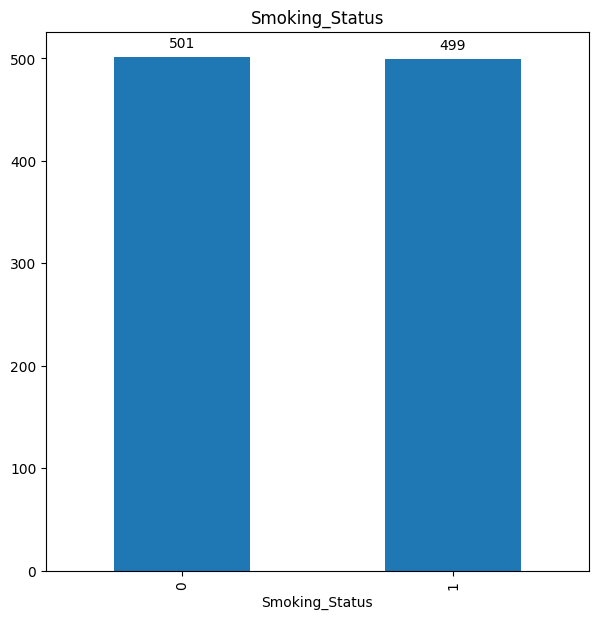

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100 * data[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)

ax = count.plot(kind='bar', title=feature)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', # Changed 'center bottom' to 'bottom'
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

Terlihat bahwa jumlah sampel yang tidak merokok adalah sebanyak 501 orang, sedangkan yang merokok sebanyak 499 orang.

### Numerical Feature

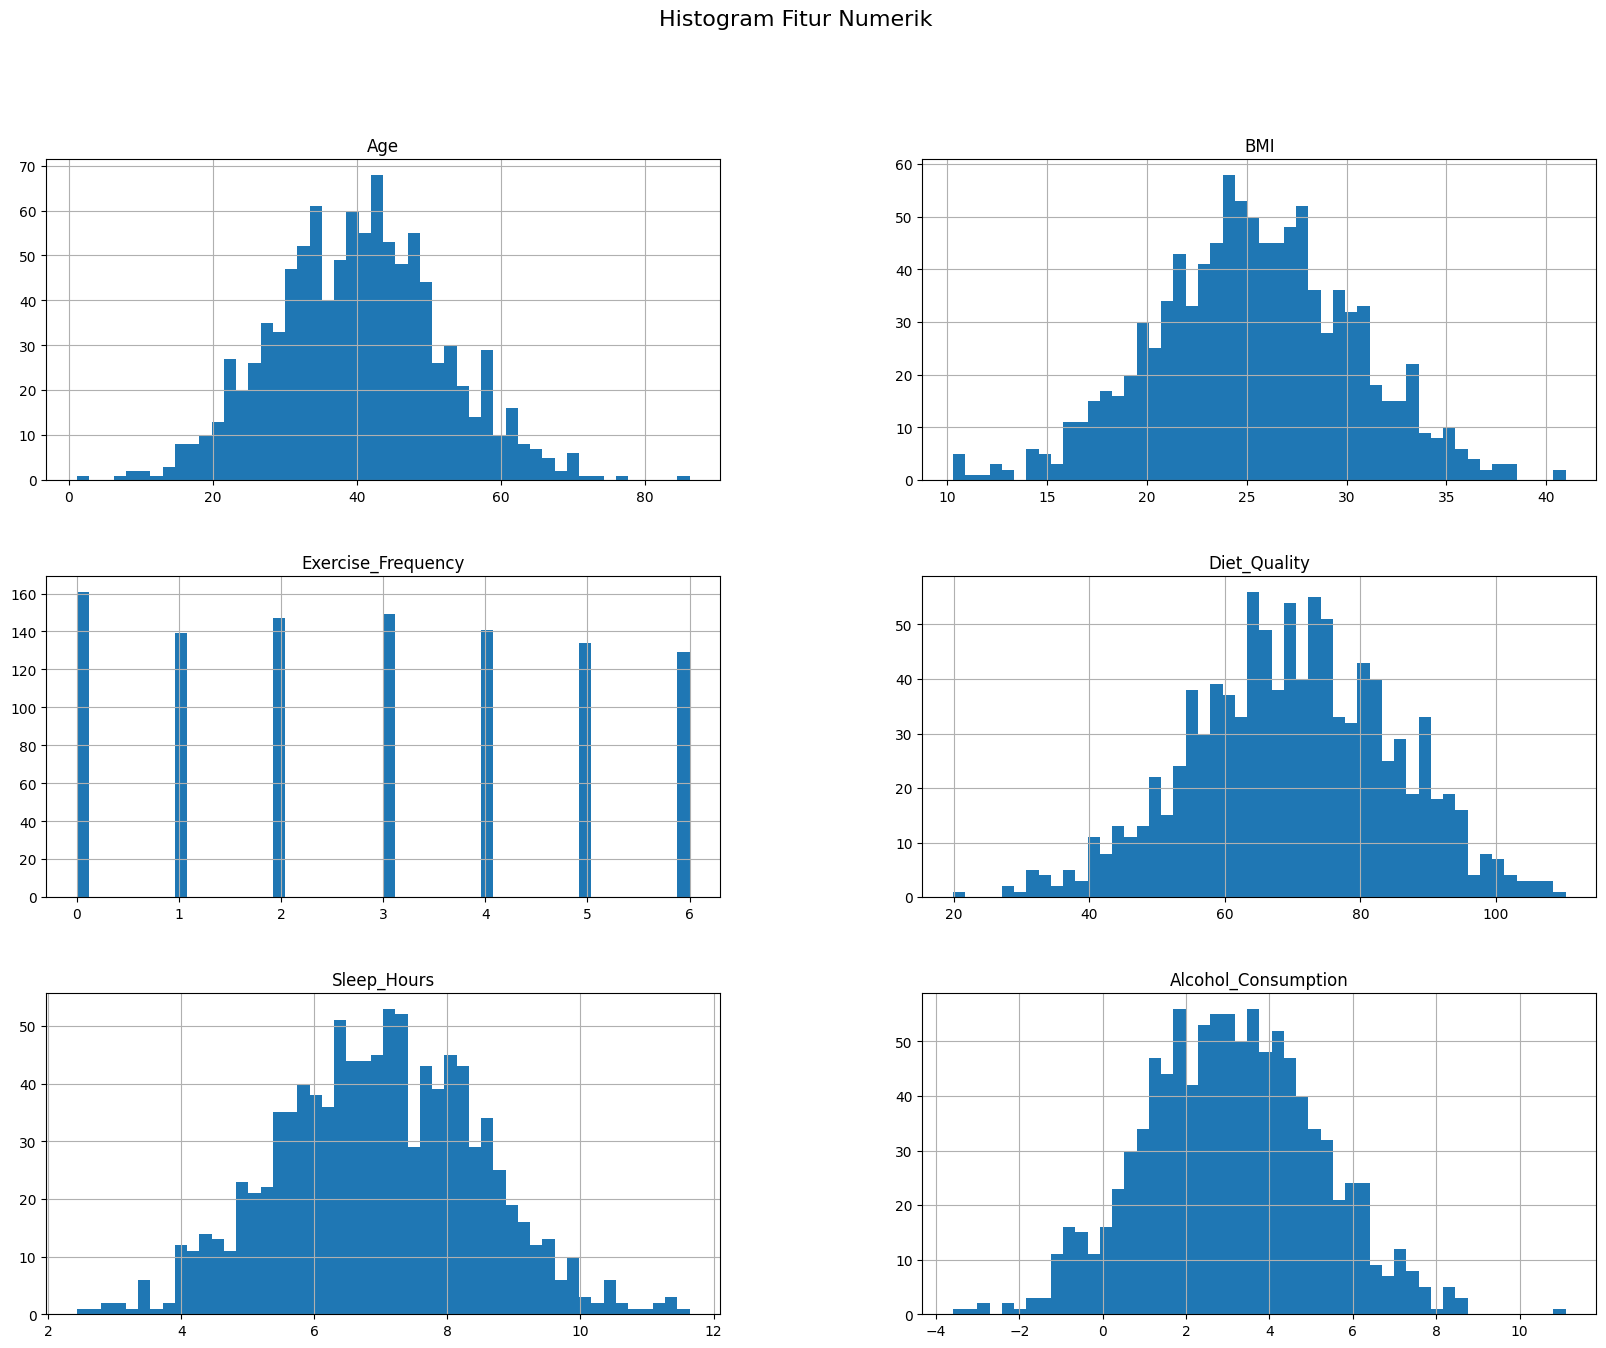

In [33]:
data[numerical_features].hist(bins=50, figsize=(20, 15))
plt.suptitle('Histogram Fitur Numerik', fontsize=16)
plt.show()

Histogram fitur numerik ini menggambarkan distribusi berbagai fitur kesehatan dan kebiasaan pada sampel data yang cukup beragam. Usia responden tersebar secara normal dengan sebagian besar berada pada rentang 20 hingga 60 tahun, menunjukkan keragaman kelompok umur. Indeks massa tubuh (BMI) juga mengikuti pola distribusi normal dengan nilai mayoritas di kisaran 18 hingga 35, mencerminkan variasi status berat badan dari yang kurus hingga kelebihan berat badan. Frekuensi olahraga merupakan fitur diskrit dengan distribusi yang relatif merata dari nol hingga enam hari per minggu, menunjukkan perbedaan kebiasaan aktivitas fisik di antara responden. Kualitas diet dan jam tidur memiliki pola distribusi normal dengan puncak pada kualitas diet sedang hingga baik serta jam tidur ideal antara enam sampai delapan jam. Konsumsi alkohol menunjukkan variasi dengan mayoritas pada tingkat konsumsi sedang, meskipun data ini mungkin mengalami transformasi nilai. Sementara itu, skor kesehatan menunjukkan pola distribusi yang tidak normal, dengan banyak responden mengisi nilai maksimal, yang dapat menunjukkan banyaknya individu dengan kondisi kesehatan sangat baik atau adanya batasan skor. Secara keseluruhan, data ini memberikan gambaran populasi yang sehat dengan variasi wajar dalam kebiasaan dan kondisi fisik, namun perlu perhatian pada distribusi skor kesehatan yang terpusat pada nilai maksimum.

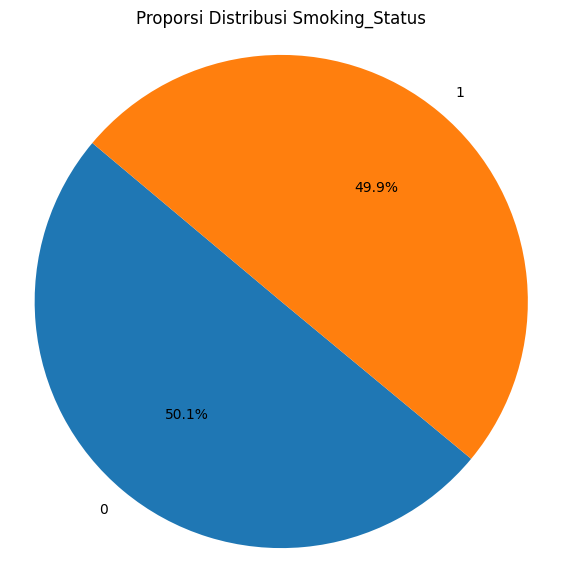

In [34]:
for feature in categorical_features:
    counts = data[feature].value_counts()
    labels = counts.index.tolist()
    sizes = counts.values.tolist()

    plt.figure(figsize=(7,7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Proporsi Distribusi {feature}')
    plt.axis('equal')
    plt.show()

Proporsi fitur smoking status, terlihat bahwa banyaknya orang yang merokok sebanyak 49,9% dan yang tidak merokok sebanyak 50,1%.

## Exploratory Data Analysis - Multivariate Analysis

### Categorical Feature

<ipython-input-35-d519d197474e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


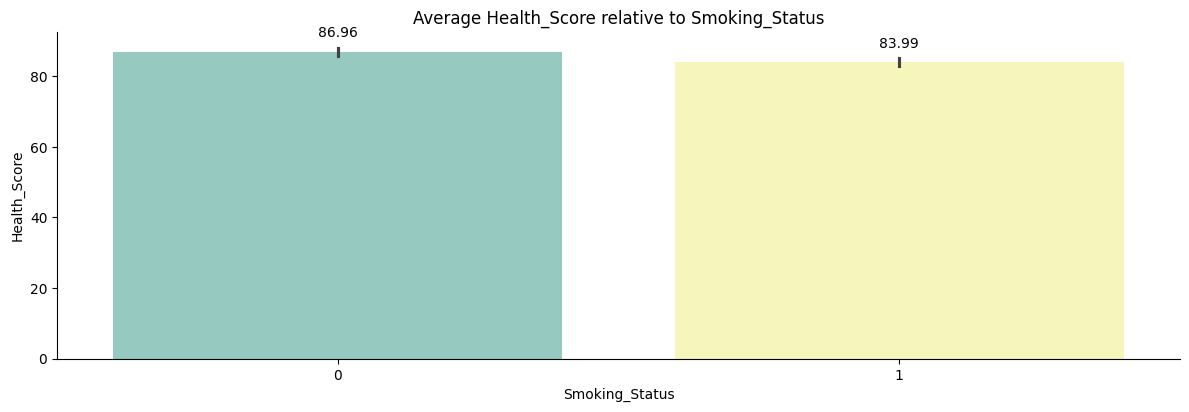

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_features = ['Smoking_Status']

for col in cat_features:
    g = sns.catplot(
        x=col,
        y="Health_Score",
        kind="bar",
        dodge=False,
        height=4,
        aspect=3,
        data=data,
        palette="Set3"
    )

    plt.title(f"Average Health_Score relative to {col}")

    for p in g.ax.patches:
        height = p.get_height()
        g.ax.text(
            p.get_x() + p.get_width() / 2.,
            height + (height * 0.05),
            f'{height:.2f}',
            ha="center"
        )
    plt.show()

Barchart menunjukkan bahwa rata-rata skor kesehatan pada kelompok non-perokok (Smoking_Status = 0) sebesar 86,96, sedikit lebih tinggi dibandingkan dengan kelompok perokok (Smoking_Status = 1) yang memiliki rata-rata skor kesehatan 83,99. Perbedaan ini mengindikasikan bahwa status merokok berpengaruh negatif terhadap kesehatan, di mana perokok cenderung memiliki kondisi kesehatan yang lebih rendah.

### Numerical Feature

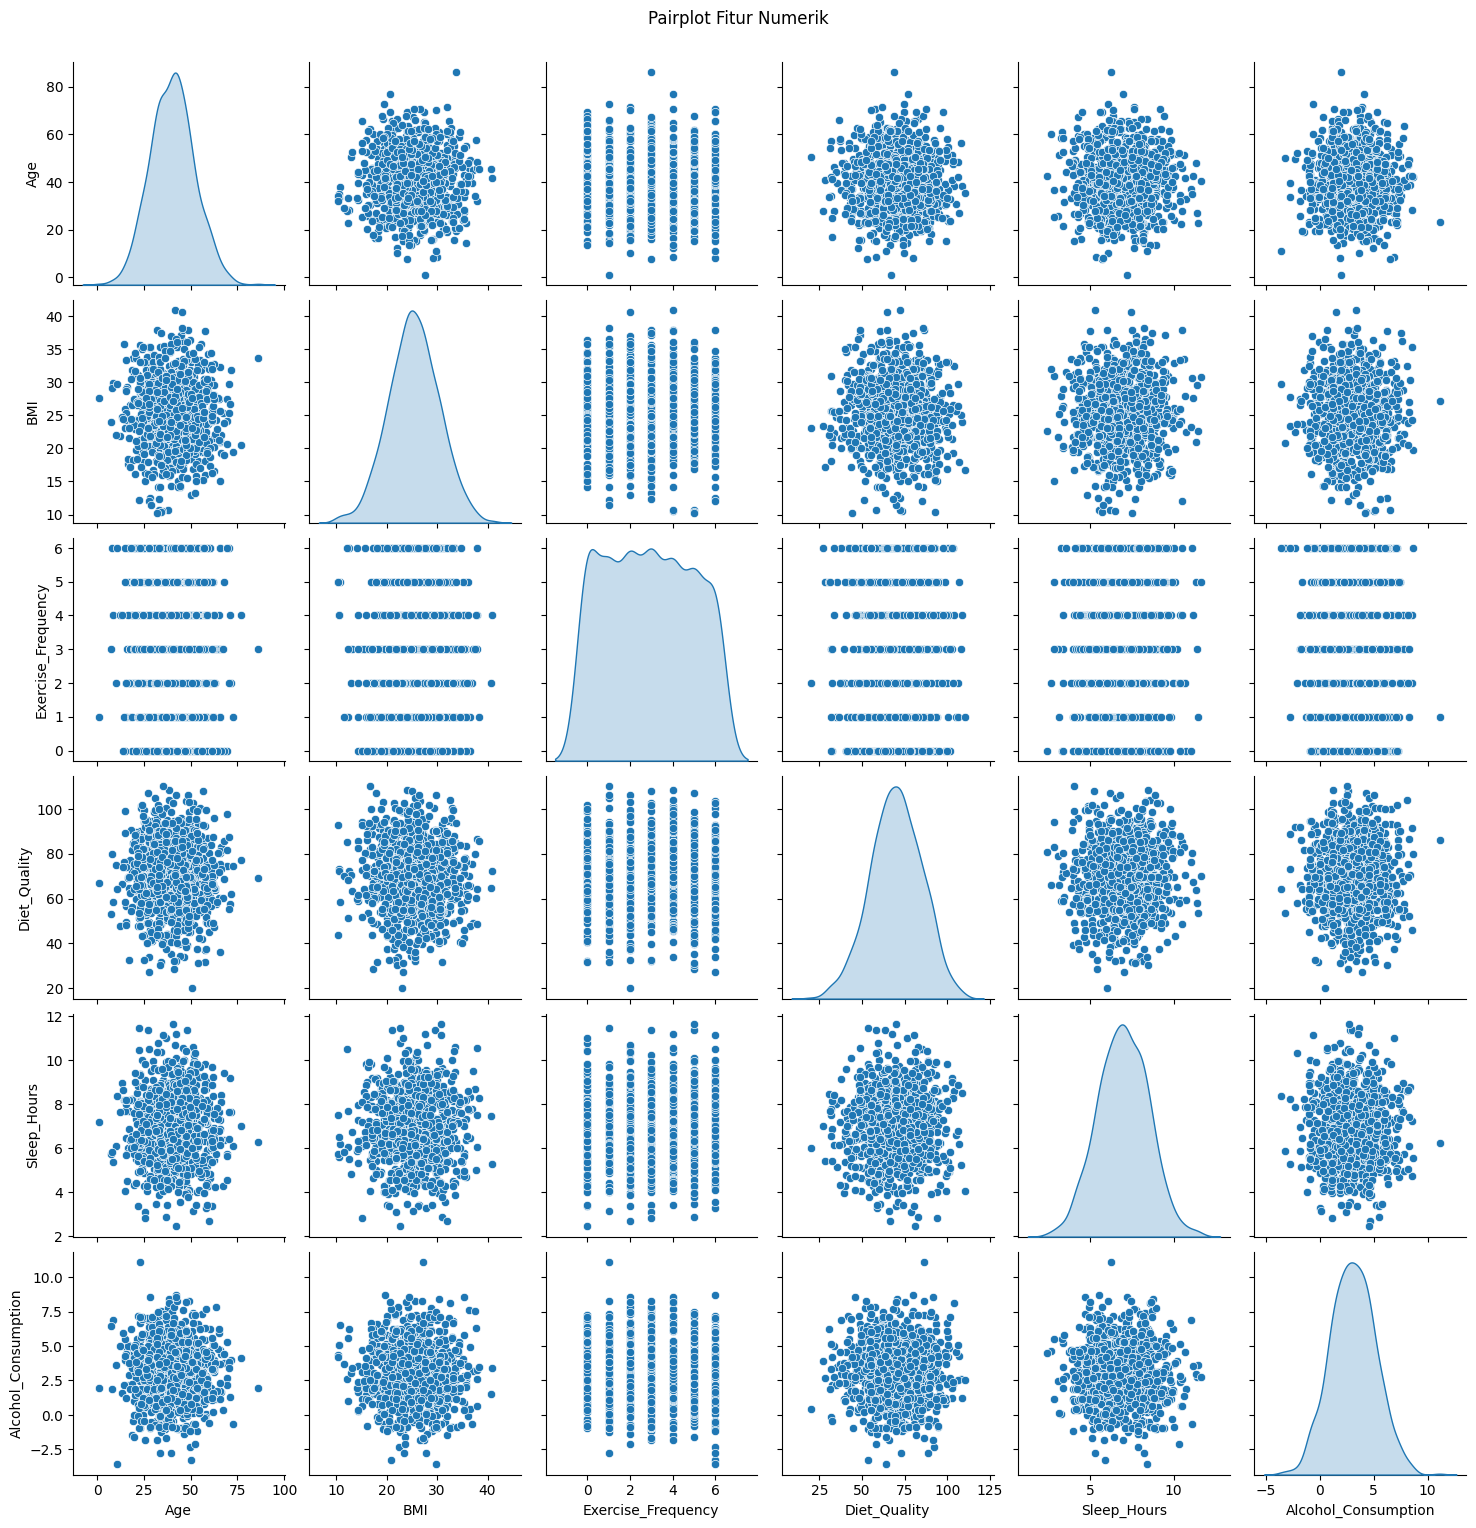

In [36]:
sns.pairplot(data[numerical_features], diag_kind='kde')
plt.suptitle('Pairplot Fitur Numerik', y=1.02)
plt.show()

Pairplot ini memperlihatkan hubungan antar fitur numerik dalam data kesehatan. Skor kesehatan (Health Score) memiliki korelasi positif dengan kualitas diet (Diet Quality), frekuensi olahraga (Exercise Frequency), dan jam tidur (Sleep Hours), yang menunjukkan bahwa gaya hidup sehat berkontribusi meningkatkan kesehatan. Sebaliknya, usia (Age) dan indeks massa tubuh (BMI) menunjukkan korelasi negatif dengan skor kesehatan, yang berarti peningkatan usia dan BMI berpotensi menurunkan kondisi kesehatan. Distribusi frekuensi olahraga berupa hitungan jumlah olahraga dalam satu minggu dan tersebar merata. Secara keseluruhan, pola ini menegaskan pentingnya gaya hidup sehat dalam menunjang skor kesehatan responden.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

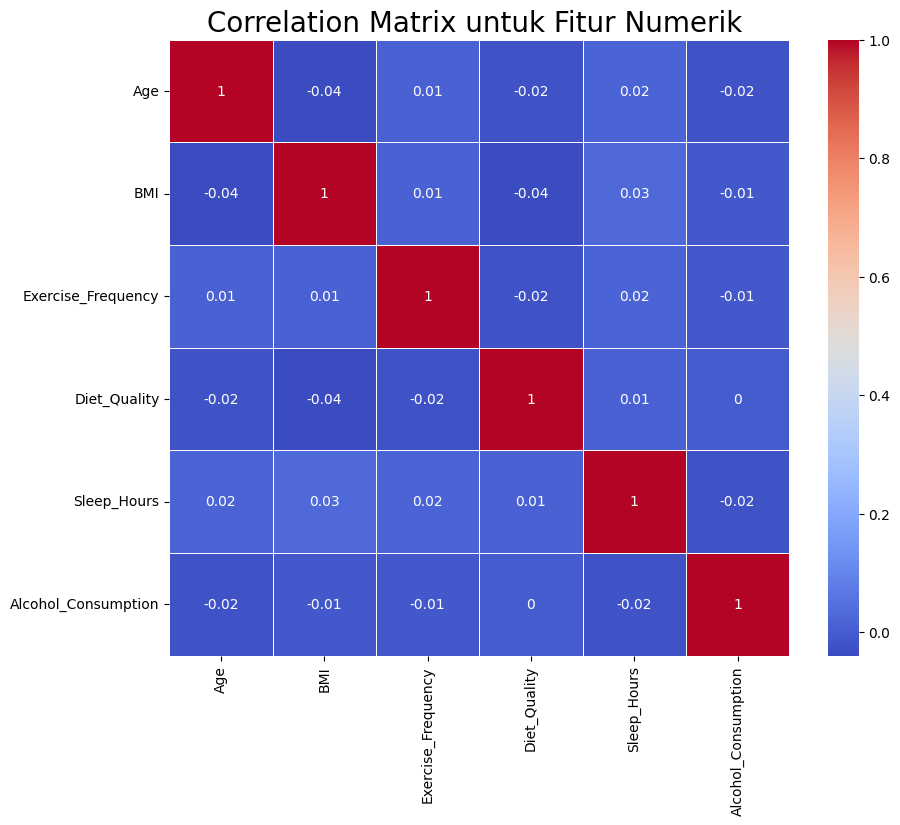

In [37]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Matriks korelasi pada gambar menunjukkan hubungan antar fitur numerik dalam data kesehatan. Hasil analisis memperlihatkan bahwa kualitas diet memiliki korelasi positif paling kuat dengan skor kesehatan (0,68), menandakan bahwa pola makan yang baik sangat berkontribusi terhadap peningkatan kesehatan. Selain itu, jam tidur (0,27) dan frekuensi olahraga (0,25) juga menunjukkan korelasi positif sedang dengan skor kesehatan, yang mengindikasikan pentingnya tidur cukup dan aktivitas fisik rutin dalam menunjang kesehatan. Sebaliknya, indeks massa tubuh (BMI) memiliki korelasi negatif yang cukup signifikan (-0,42) dengan skor kesehatan, serta usia juga menunjukkan korelasi negatif lemah (-0,19), menunjukkan bahwa peningkatan berat badan dan bertambahnya usia berpotensi menurunkan kondisi kesehatan. Konsumsi alkohol menunjukkan korelasi negatif ringan (-0,14), sementara korelasi antar fitur lain relatif kecil, menandakan fitur-fitur tersebut relatif independen satu sama lain dalam kaitannya dengan skor kesehatan.

Berdasarkan analisis korelasi dan visualisasi multivariat, fitur-fitur gaya hidup seperti kualitas diet, frekuensi olahraga, dan jam tidur menunjukkan pengaruh positif terhadap skor kesehatan, sedangkan BMI dan usia memberikan pengaruh negatif yang signifikan.

# Data Preparation

## Encoding Data Categorical

Karena dataset yang digunakan yang harusnya kategorik sudah dalam tipe numerik maka tidak perlu dilakukan encoding.

## Train Test Split

Dataset dibagi menjadi 80:20, yaitu 80% untuk data training dan 20% untuk data testing. Pembagian tersebut merupakan pembagian yang umum digunakan untuk memberikan keseimbangan antara jumlah data yang cukup untuk melatih model dan jumlah data yang cukup untuk menguji performa model. Namun, tidak ada aturan khusus dalam pembagian data ini, bergantung pada jenis data yang digunakan dan juga sesuai kebutuhan analisis.

In [38]:
from sklearn.model_selection import train_test_split

X = data.drop(["Health_Score"],axis =1)
y = data["Health_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1000
Total # of sample in train dataset: 800
Total # of sample in test dataset: 200


## Standarisasi

Standarisasi fitur numerik. Standarisasi merupakan proses mengubah skala data agar memiliki rata-rata (mean) = 0 dan simpangan baku (standar deviasi) = 1. Tujuannya adalah membantu model bekerja lebih optimal.

In [40]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age', 'BMI', 'Exercise_Frequency', 'Diet_Quality', 'Sleep_Hours','Alcohol_Consumption']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Alcohol_Consumption
29,-0.323727,-1.113351,1.608344,1.414289,0.082266,0.297267
535,0.022387,-1.687893,-0.912572,0.086502,0.645047,0.722177
695,-0.341949,1.862002,1.608344,-0.854919,0.405962,-0.208343
557,-0.467508,-0.892726,0.095795,-0.368337,-0.512749,-0.328046
836,1.556611,-1.234841,1.608344,-0.449764,0.828012,0.546565


In [41]:
X_train[numerical_features].describe().round(4)

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Alcohol_Consumption
count,800.0000,800.0000,800.0000,800.0000,800.0000,800.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006
min,-3.3344,-3.0398,-1.4168,-2.8977,-3.0344,-2.9935
25%,-0.6904,-0.6949,-0.9126,-0.6864,-0.7170,-0.6877
50%,-0.0129,0.0036,0.0958,-0.0103,0.0169,-0.0266
75%,0.6334,0.6412,0.6000,0.7118,0.7075,0.6915
max,3.1166,3.1220,1.6083,2.5704,3.0014,3.7592


# Model Development

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:
- SVR
- Random Forest
- Boosting Algorithm

In [42]:
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
datasets = ['train', 'test']
models = ['SVR', 'RandomForest', 'XGBoost']

index = pd.MultiIndex.from_product([metrics, datasets], names=['Metric', 'Dataset'])

models = pd.DataFrame(index=index, columns=models)

## SVR

In [43]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

svr = SVR()
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
param_grid_svr = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 0.2]
}

grid_search_svr = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svr,
    scoring=mse_scorer,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search_svr.fit(X_train, y_train)

best_svr = grid_search_svr.best_estimator_
print("Best parameters:", grid_search_svr.best_params_)
print("Best CV MSE:", -grid_search_svr.best_score_)

y_train_pred = best_svr.predict(X_train)
y_test_pred = best_svr.predict(X_test)

models.loc[('MAE', 'train'), 'SVR'] = mean_absolute_error(y_train, y_train_pred)
models.loc[('MSE', 'train'), 'SVR'] = mean_squared_error(y_train, y_train_pred)
models.loc[('RMSE', 'train'), 'SVR'] = np.sqrt(mean_squared_error(y_train, y_train_pred))
models.loc[('R2', 'train'), 'SVR'] = r2_score(y_train, y_train_pred)

models.loc[('MAE', 'test'), 'SVR'] = mean_absolute_error(y_test, y_test_pred)
models.loc[('MSE', 'test'), 'SVR'] = mean_squared_error(y_test, y_test_pred)
models.loc[('RMSE', 'test'), 'SVR'] = np.sqrt(mean_squared_error(y_test, y_test_pred))
models.loc[('R2', 'test'), 'SVR'] = r2_score(y_test, y_test_pred)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters: {'C': 10, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV MSE: 26.229921740714484


Best parameters dari pemodelan menggunakan SVR, yaitu {'C': 10, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'} dengan Best CV MSE sebesar 26,23

## Random Forest

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=55, n_jobs=-1)

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 16],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print("Best parameters Random Forest:", grid_search_rf.best_params_)
print("Best CV MSE Random Forest:", -grid_search_rf.best_score_)

y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

models.loc[('MAE', 'train'), 'RandomForest'] = mean_absolute_error(y_train, y_train_pred)
models.loc[('MSE', 'train'), 'RandomForest'] = mean_squared_error(y_train, y_train_pred)
models.loc[('RMSE', 'train'), 'RandomForest'] = np.sqrt(mean_squared_error(y_train, y_train_pred))
models.loc[('R2', 'train'), 'RandomForest'] = r2_score(y_train, y_train_pred)

models.loc[('MAE', 'test'), 'RandomForest'] = mean_absolute_error(y_test, y_test_pred)
models.loc[('MSE', 'test'), 'RandomForest'] = mean_squared_error(y_test, y_test_pred)
models.loc[('RMSE', 'test'), 'RandomForest'] = np.sqrt(mean_squared_error(y_test, y_test_pred))
models.loc[('R2', 'test'), 'RandomForest'] = r2_score(y_test, y_test_pred)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters Random Forest: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV MSE Random Forest: 40.762534234564356


Best parameters Random Forest: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} dengan Best CV MSE sebesar 40,76.

## XGBoost

In [45]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=55, n_jobs=-1)

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_
print("Best parameters XGBoost:", grid_search_xgb.best_params_)
print("Best CV MSE XGBoost:", -grid_search_xgb.best_score_)

y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

models.loc[('MAE', 'train'), 'XGBoost'] = mean_absolute_error(y_train, y_train_pred)
models.loc[('MSE', 'train'), 'XGBoost'] = mean_squared_error(y_train, y_train_pred)
models.loc[('RMSE', 'train'), 'XGBoost'] = np.sqrt(mean_squared_error(y_train, y_train_pred))
models.loc[('R2', 'train'), 'XGBoost'] = r2_score(y_train, y_train_pred)

models.loc[('MAE', 'test'), 'XGBoost'] = mean_absolute_error(y_test, y_test_pred)
models.loc[('MSE', 'test'), 'XGBoost'] = mean_squared_error(y_test, y_test_pred)
models.loc[('RMSE', 'test'), 'XGBoost'] = np.sqrt(mean_squared_error(y_test, y_test_pred))
models.loc[('R2', 'test'), 'XGBoost'] = r2_score(y_test, y_test_pred)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best CV MSE XGBoost: 31.106934940334213


Best parameter XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}) dengan Best CV MSE sebesar 31,11

# Model Evaluation

Evaluasi model yang sudah dibangun menggunakan beberapa metrik, yaitu MAE, MSE, RMSE, dan R².

In [46]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = X_test.loc[:, numerical_features].astype(float)
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

<ipython-input-46-b44ec1c846a4>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.40838837  1.6083443   1.6083443   0.59997797  0.0957948   1.6083443
  0.59997797  0.0957948   1.10416114  0.59997797  0.59997797  1.10416114
  1.10416114 -0.40838837  1.10416114  0.0957948  -1.4167547  -0.91257153
  0.59997797  0.59997797 -0.91257153  1.6083443  -0.91257153  0.0957948
 -0.91257153  0.59997797  0.59997797 -0.40838837  1.10416114  0.59997797
 -0.91257153  1.6083443   1.10416114 -0.91257153  1.10416114  1.10416114
 -1.4167547   0.59997797 -1.4167547   1.6083443   1.6083443   1.6083443
 -0.40838837  0.0957948   1.6083443  -0.40838837  0.0957948   1.6083443
  1.10416114  1.6083443   1.6083443   1.6083443   0.0957948   1.6083443
  0.0957948   0.0957948   1.6083443  -0.91257153  0.0957948  -1.4167547
  0.59997797 -1.4167547   1.6083443   0.0957948   0.59997797 -1.4167547
 -0.40838837  0.59997797 -0.91257153 -0.91257153  1

In [47]:
model_dict = {'SVR': best_svr, 'RandomForest': best_rf, 'XGBoost': best_xgb}

for name, model in model_dict.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    models.loc[('MAE', 'train'), name] = mean_absolute_error(y_train, y_train_pred)
    models.loc[('MSE', 'train'), name] = mean_squared_error(y_train, y_train_pred)
    models.loc[('RMSE', 'train'), name] = np.sqrt(mean_squared_error(y_train, y_train_pred))
    models.loc[('R2', 'train'), name] = r2_score(y_train, y_train_pred)

    models.loc[('MAE', 'test'), name] = mean_absolute_error(y_test, y_test_pred)
    models.loc[('MSE', 'test'), name] = mean_squared_error(y_test, y_test_pred)
    models.loc[('RMSE', 'test'), name] = np.sqrt(mean_squared_error(y_test, y_test_pred))
    models.loc[('R2', 'test'), name] = r2_score(y_test, y_test_pred)

print(models)

                      SVR RandomForest    XGBoost
Metric Dataset                                   
MAE    train     2.718152     1.716934   2.649905
       test      3.653235     4.030895   3.990092
MSE    train    15.535832     5.293374  11.260271
       test     26.837114    31.596436  28.890275
RMSE   train     3.941552     2.300733   3.355633
       test      5.180455     5.621071   5.374967
R2     train      0.91528     0.971134   0.938596
       test      0.862347     0.837935   0.851816


- Nilai MAE lebih kecil menunjukkan prediksi lebih akurat secara rata-rata. Pada data test, SVR menghasilkan MAE 3.65 yang lebih baik dibanding RandomForest (4.03) dan XGBoost (3.99). Ini berarti prediksi SVR lebih dekat secara rata-rata ke nilai sebenarnya.
- MSE memberi penalti lebih berat terhadap kesalahan yang besar. Nilai MSE test SVR (26.83) lebih rendah daripada RandomForest (31.59) dan XGBoost (28.89), menunjukkan model SVR memiliki kesalahan kuadrat yang lebih kecil. Namun, perbedaan tidak terlalu besar.
- RMSE test SVR (5.18) sedikit lebih rendah dibanding RandomForest (5.62) dan XGBoost (5.37), mengonfirmasi bahwa model SVR secara umum memiliki kesalahan prediksi yang lebih kecil.
- Nilai R² test SVR (0.86) tertinggi dibandingkan RandomForest (0.84) dan XGBoost (0.85), menandakan SVR mampu menjelaskan variansi health score paling baik pada data test. Nilai R2 di atas 0.8 menunjukkan model yang cukup baik dalam memprediksi target.

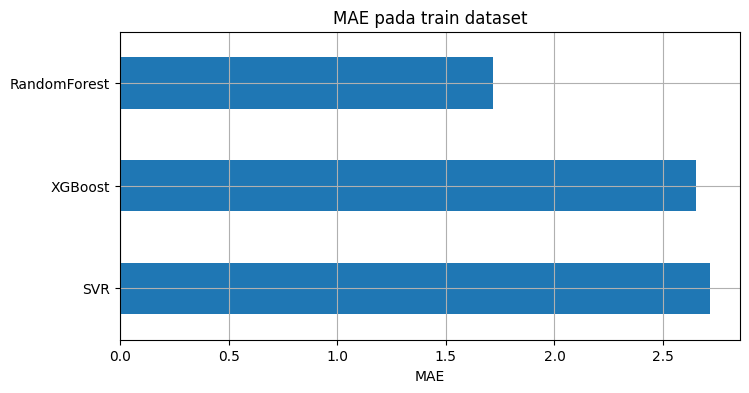

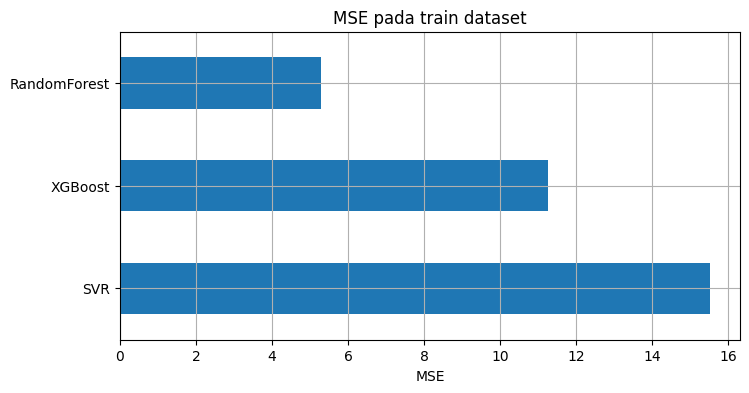

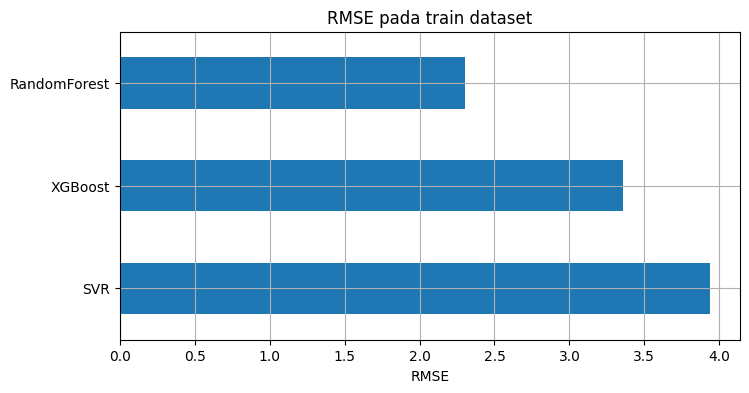

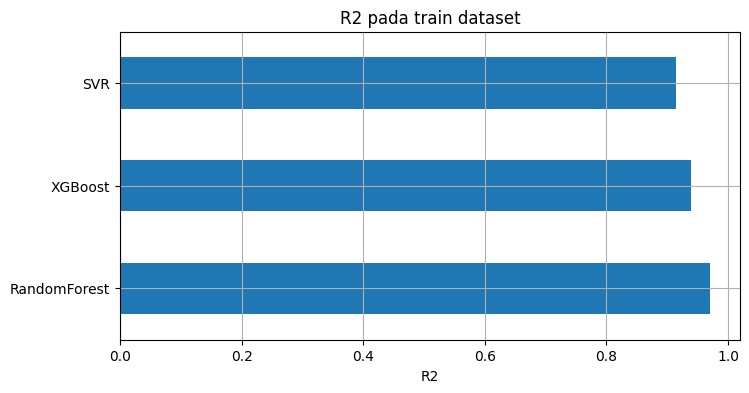

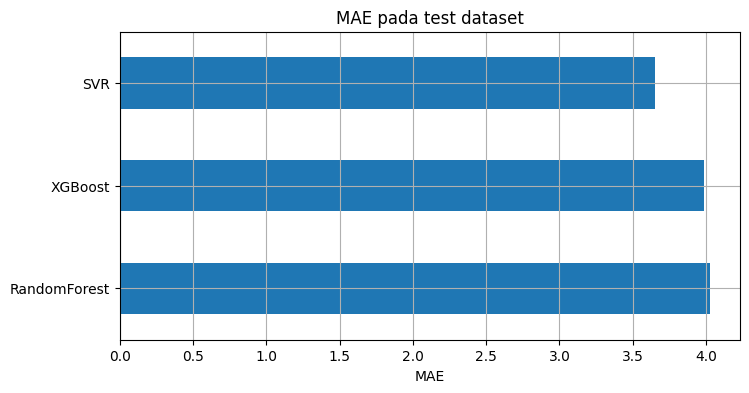

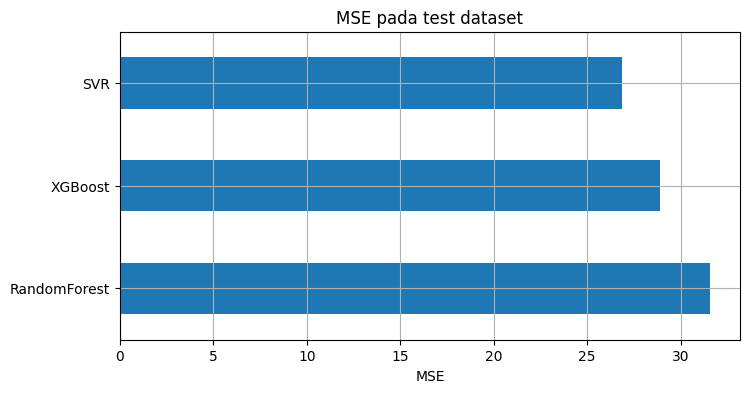

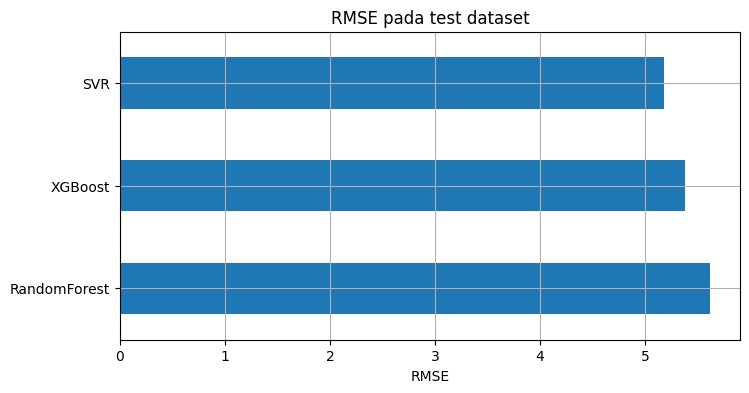

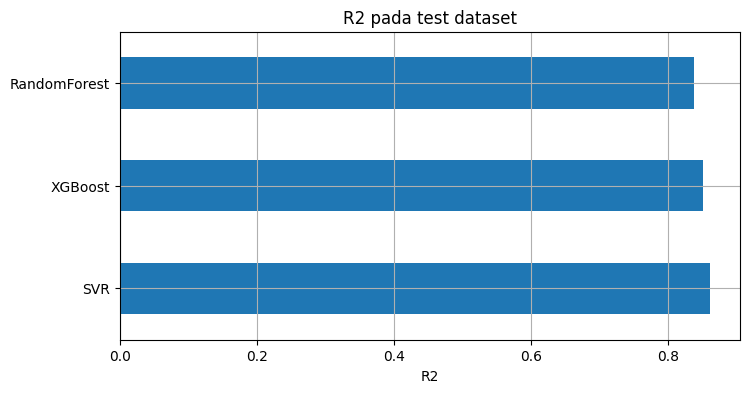

In [48]:
datasets = ['train', 'test']
metrics = ['MAE', 'MSE', 'RMSE', 'R2']

for dataset in datasets:
    for metric in metrics:
        plt.figure(figsize=(8, 4))
        data_to_plot = models.loc[(metric, dataset)]
        data_to_plot.sort_values(ascending=False).plot(kind='barh')
        plt.title(f'{metric} pada {dataset} dataset')
        plt.xlabel(metric)
        plt.grid(True)
        plt.show()

In [49]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_SVR,prediksi_RandomForest,prediksi_XGBoost
521,78.259733,84.2,79.8,86.800003
737,100.000000,98.9,95.0,97.800003
740,84.654773,86.6,79.3,81.300003
660,88.754538,80.7,81.0,80.199997
411,100.000000,100.5,99.3,100.800003


Contoh prediksi untuk lima data.